In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from itertools import permutations


In [3]:
# Create sample locations with their latitude and longitude
locations = {
    'Location_A': (12.9715987, 77.5945627),
    'Location_B': (12.2958104, 76.6393805),
    'Location_C': (12.9141417, 74.8559568),
    'Location_D': (15.3172775, 75.7138884),
    'Location_E': (13.0826802, 80.2707184),
    'Location_F': (13.6287557, 79.4191795),
    'Location_G': (11.0168445, 76.9558321),
    'Location_H': (10.8505159, 76.2710833)
}

# Convert locations to a DataFrame
df = pd.DataFrame(list(locations.items()), columns=['Location', 'Coordinates'])

# Add additional delivery-related data
df['Order_ID'] = ['001', '002', '003', '004', '005', '006', '007', '008']
df['Vehicle_Type'] = ['Truck', 'Van', 'Bike', 'Truck', 'Van', 'Bike', 'Truck', 'Van']
df['Vehicle_Capacity (kg)'] = [1000, 500, 50, 800, 600, 50, 1000, 500]
df['Delivery_Deadline'] = ['12:30 PM', '1:00 PM', '11:45 AM', '2:00 PM', '1:30 PM', '3:00 PM', '2:30 PM', '4:00 PM']
df['Delivery_Status'] = ['Delivered', 'Pending', 'Delivered', 'Pending', 'Delivered', 'Pending', 'Delivered', 'Pending']

# Display the dataset
print(df)


     Location               Coordinates Order_ID Vehicle_Type  \
0  Location_A  (12.9715987, 77.5945627)      001        Truck   
1  Location_B  (12.2958104, 76.6393805)      002          Van   
2  Location_C  (12.9141417, 74.8559568)      003         Bike   
3  Location_D  (15.3172775, 75.7138884)      004        Truck   
4  Location_E  (13.0826802, 80.2707184)      005          Van   
5  Location_F  (13.6287557, 79.4191795)      006         Bike   
6  Location_G  (11.0168445, 76.9558321)      007        Truck   
7  Location_H  (10.8505159, 76.2710833)      008          Van   

   Vehicle_Capacity (kg) Delivery_Deadline Delivery_Status  
0                   1000          12:30 PM       Delivered  
1                    500           1:00 PM         Pending  
2                     50          11:45 AM       Delivered  
3                    800           2:00 PM         Pending  
4                    600           1:30 PM       Delivered  
5                     50           3:00 PM      

In [5]:
# Extract coordinates from the dataset
coordinates = np.array([list(coord) for coord in df['Coordinates']])

# Calculate the Euclidean distance between all locations
dist_matrix = distance_matrix(coordinates, coordinates)

# Convert the distance matrix to a DataFrame for easier understanding
dist_df = pd.DataFrame(dist_matrix, index=df['Location'], columns=df['Location'])

# Display the distance matrix
print("Distance Matrix:")
print(dist_df)


Distance Matrix:
Location    Location_A  Location_B  Location_C  Location_D  Location_E  \
Location                                                                 
Location_A    0.000000    1.170070    2.739209    3.006517    2.678460   
Location_B    1.170070    0.000000    1.887573    3.160031    3.715613   
Location_C    2.739209    1.887573    0.000000    2.551687    5.417384   
Location_D    3.006517    3.160031    2.551687    0.000000    5.075246   
Location_E    2.678460    3.715613    5.417384    5.075246    0.000000   
Location_F    1.939351    3.082860    4.618839    4.071890    1.011591   
Location_G    2.056463    1.317534    2.830055    4.476176    3.905912   
Location_H    2.500118    1.491482    2.502226    4.501380    4.580354   

Location    Location_F  Location_G  Location_H  
Location                                        
Location_A    1.939351    2.056463    2.500118  
Location_B    3.082860    1.317534    1.491482  
Location_C    4.618839    2.830055    2.502226

In [6]:
# Function to calculate the shortest route using a brute-force TSP approach
def calculate_route_tsp(dist_matrix):
    # Get all permutations of location indices (excluding the first one since it’s the starting point)
    num_locations = len(dist_matrix)
    locations = range(1, num_locations)  # Exclude the first location (starting point)

    # Initialize the shortest route and minimum distance
    shortest_route = None
    min_distance = float('inf')

    # Try all possible routes (permutations of locations)
    for route in permutations(locations):
        # Create a complete route by returning to the starting point
        current_route = [0] + list(route) + [0]
        # Calculate the total distance of this route
        distance = sum(dist_matrix[current_route[i], current_route[i+1]] for i in range(num_locations))
        
        # Update if this route is shorter
        if distance < min_distance:
            min_distance = distance
            shortest_route = current_route

    return shortest_route, min_distance

# Find the optimal route and its total distance
optimal_route, total_distance = calculate_route_tsp(dist_matrix)

# Display the optimal route
optimal_route_locations = [df['Location'].iloc[i] for i in optimal_route]
print(f"Optimal Route: {optimal_route_locations}")
print(f"Total Distance: {total_distance:.2f} km")


Optimal Route: ['Location_A', 'Location_B', 'Location_G', 'Location_H', 'Location_C', 'Location_D', 'Location_F', 'Location_E', 'Location_A']
Total Distance: 16.01 km


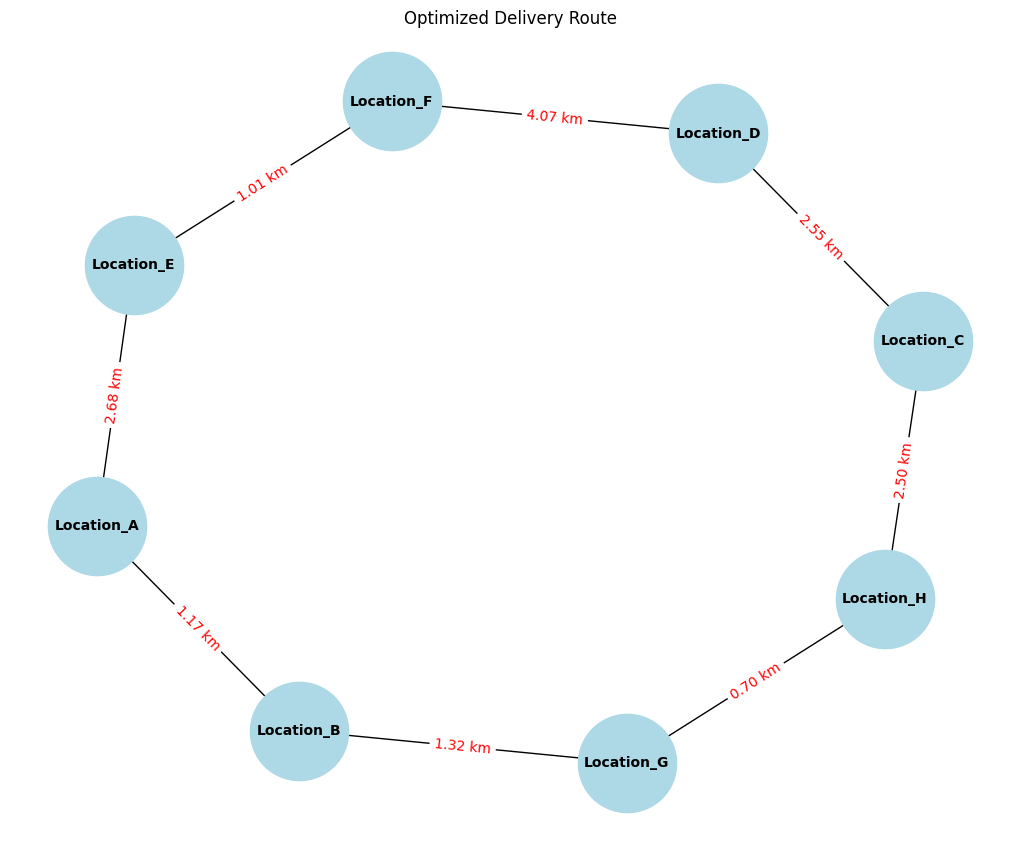

In [7]:
# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each location
for loc in df['Location']:
    G.add_node(loc)

# Add edges for the optimal route
for i in range(len(optimal_route_locations) - 1):
    G.add_edge(optimal_route_locations[i], optimal_route_locations[i+1])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Position nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=5000, font_weight='bold')

# Label the edges with distances
edge_labels = {(optimal_route_locations[i], optimal_route_locations[i+1]): 
               f"{dist_df[optimal_route_locations[i]][optimal_route_locations[i+1]]:.2f} km"
               for i in range(len(optimal_route_locations) - 1)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Optimized Delivery Route")
plt.show()
